In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1]
customers = dataset.iloc[:, 0]
y = dataset.iloc[:, -1]

In [118]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))

In [119]:
X_scaled = scalar.fit_transform(X)

In [120]:
from minisom import MiniSom

In [121]:
som = MiniSom(10, 10, 15)

In [122]:
som.random_weights_init(X_scaled)

In [123]:
som.train_random(X_scaled, 100)

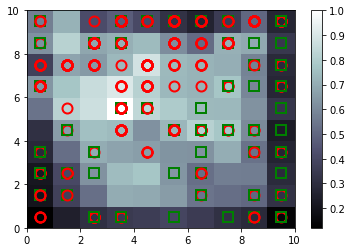

In [124]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [125]:
winners_map = som.win_map(X_scaled)

In [126]:
# fetch the coordinates as per the image coloring. As the weights initialization is random, this part might give incorrect results
# In next iterations with same values.
frauds = np.concatenate((winners_map[(1,5)], winners_map[(3,7)]), axis = 0)
frauds = scalar.inverse_transform(frauds)

In [127]:
frauds[:, 0]

array([15767264., 15700549.])

In [128]:
y.values

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [129]:
#customers = customers.values.reshape(-1,1)
#y_vals = y.values.reshape(-1,1)

In [89]:
combined = np.concatenate((customers, y_vals), axis = 1)

In [114]:
combined[(combined[:, 1] == 1)]

array([[15687688,        1],
       [15715750,        1],
       [15571121,        1],
       [15660390,        1],
       [15644446,        1],
       [15585892,        1],
       [15803378,        1],
       [15692408,        1],
       [15683168,        1],
       [15790254,        1],
       [15768600,        1],
       [15714087,        1],
       [15588123,        1],
       [15748552,        1],
       [15618410,        1],
       [15672432,        1],
       [15583680,        1],
       [15686461,        1],
       [15678882,        1],
       [15789611,        1],
       [15668679,        1],
       [15631685,        1],
       [15753591,        1],
       [15738487,        1],
       [15737627,        1],
       [15757467,        1],
       [15682860,        1],
       [15621546,        1],
       [15684512,        1],
       [15671769,        1],
       [15789201,        1],
       [15766183,        1],
       [15777994,        1],
       [15730793,        1],
       [157757

In [113]:
X[X["CustomerID"] == 15659100]

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
155,15659100,1,19.17,0.0,1,7,5,0.0,0,0,0,1,1,500,2


In [115]:
X[X["CustomerID"] == 15687688]

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
3,15687688,0,21.67,11.5,1,5,3,0.0,1,1,11,1,2,0,1
